In [6]:
# -*- encoding : utf-8 -*-

#参考
#Qiitaの記事
#http://qiita.com/icoxfog417/items/53e61496ad980c41a08e#%E6%A4%9C%E5%87%BA%E9%A0%98%E5%9F%9F%E3%81%AE%E5%88%87%E3%82%8A%E5%87%BA%E3%81%97

%matplotlib inline
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img = cv2.imread('image/bird.jpg')
print(img)

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ..., 
  [246 229 210]
  [243 226 207]
  [239 222 203]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ..., 
  [244 227 206]
  [246 229 208]
  [246 229 208]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ..., 
  [235 218 197]
  [239 222 201]
  [240 223 202]]

 ..., 
 [[ 73  74  64]
  [ 76  77  68]
  [ 80  81  72]
  ..., 
  [ 11  17  16]
  [ 19  24  23]
  [ 18  19  17]]

 [[ 68  69  59]
  [ 72  73  64]
  [ 78  79  70]
  ..., 
  [  5  13  12]
  [ 16  21  20]
  [ 15  16  14]]

 [[ 62  63  53]
  [ 67  68  58]
  [ 73  74  65]
  ..., 
  [  9  17  16]
  [ 17  22  21]
  [ 14  15  13]]]


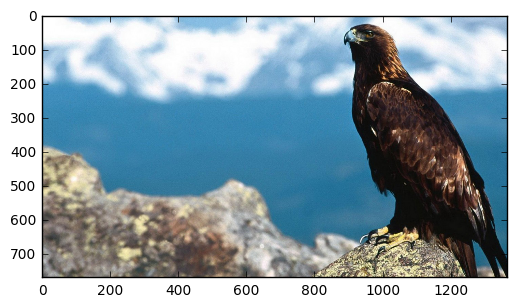

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
def detect_contour(path, min_size):
    contoured = cv2.imread(path)
    forcrop = cv2.imread(path)
    
    #make binary image
    birds = binary_threshold_for_birds(path)
    birds = cv2.bitwise_not(birds)
    
    #detect contour
    im2, contours, hierarchy = cv2.findContours(birds, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    cromps = []
    #draw contour
    for c in contours:
        if cv2.contourArea(c) < min_size:
            continue
            
        #retangle area
        x, y, w, h = cv2.boundingRect(c)
        x, y, w, h = padding_position(x, y, w, h, 5)
        
        #crop the image
        cropped = forcrop[y:(y+h), x:(x+w)]
        cropped = resize_image(cropped, (210,210))
        crops.append(cropped)
        
        #draw contour
        cv2.drawContours(contoured, c, -1, (0,0,255), 3) #contour
        cv2.retangle(contoured, (x, y), (x+w, y+h),(0,255,0), 3) #retangle contour
    
    return contoured, crops

def padding_position(x, y, w, h, p):
    return x-p, y-p, w+p*2, h+p*2